# Exploratory Data Analysis (EDA) for ML Pipeline for Short-Term Rental Prices in NYC

First we login to weights and biases, download latest version of sample.csv

In [1]:
 import wandb
 import pandas as pd

 run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
 local_path = wandb.use_artifact("sample.csv:latest").file()
 df = pd.read_csv(local_path)

wandb: Currently logged in as: statneutrino (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.7 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Now we create a pandas profile in order to do some exploratory analysis

In [2]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

We can see the following issues:
- there are missing values
- feature "last_review" is a date but it is in string format.
- "price" column has outliers
- "minimum nights" is skewed

/home/statneutrino/anaconda3/envs/mlflow-8af91d08d13566aada991fdb38ca18c4510876b2/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


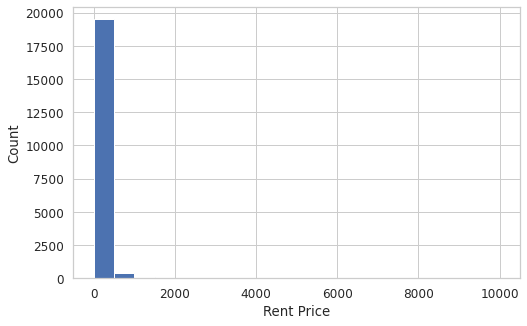

In [3]:
# View histogram of price column
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Rent Price', ylabel='Count');

In [11]:
?pd.value_counts


(-0.25, 105.083]        19926
(105.083, 209.167]         47
(313.25, 417.333]          17
(209.167, 313.25]           6
(937.75, 1041.833]          2
(417.333, 521.417]          1
(1145.917, 1250.0]          1
(521.417, 625.5]            0
(625.5, 729.583]            0
(729.583, 833.667]          0
(833.667, 937.75]           0
(1041.833, 1145.917]        0
Name: minimum_nights, dtype: int64


/home/statneutrino/anaconda3/envs/mlflow-8af91d08d13566aada991fdb38ca18c4510876b2/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


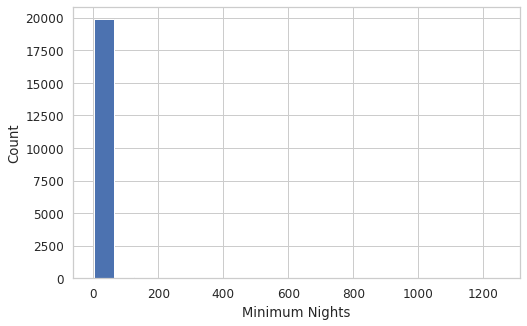

In [14]:
# View histogram of minimum_nights column
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['minimum_nights'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Minimum Nights', ylabel='Count');

#Breakdown of value counts for minimum_nights
print(df.minimum_nights.value_counts(bins=12))

We drop outliers (price < 10 or > 350) and convert last_review to datetime class

In [15]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [16]:
profile_fixed = pandas_profiling.ProfileReport(df)
profile_fixed.to_widgets()

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

/home/statneutrino/anaconda3/envs/mlflow-8af91d08d13566aada991fdb38ca18c4510876b2/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


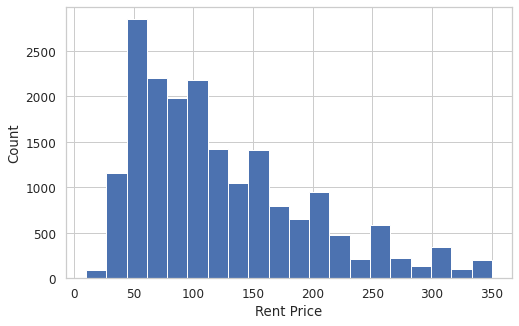

In [18]:
#Check price column after outliers removed
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Rent Price', ylabel='Count');

In [17]:
run.finish()